In [31]:
%load_ext memory_profiler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import time
from memory_profiler import profile
import matplotlib.pyplot as plt


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [32]:
X = np.load("data/p1/X.npy")
y = np.load("data/p1/y.npy")

In [33]:
print(X.shape)

(511, 45768)


In [34]:
np.max(X[:,0])

11.941397591320595

In [35]:
# log
X_log = np.log2(X + 1)

In [36]:
# Largest entry of first column
print(np.max(X_log[:,0]))

3.6939215228197613


In [37]:
%%timeit -n 1 -r 1
%%memit -r 1
pca =  PCA().fit(X)
pca_log = PCA().fit(X_log)

peak memory: 1712.36 MiB, increment: 535.26 MiB
4.64 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [38]:
# percentage of variance explained by first component
print("First component raw:", pca.explained_variance_ratio_[0])
print("First component log:", pca_log.explained_variance_ratio_[0])

First component raw: 0.42779670983572776
First component log: 0.13887564870826172


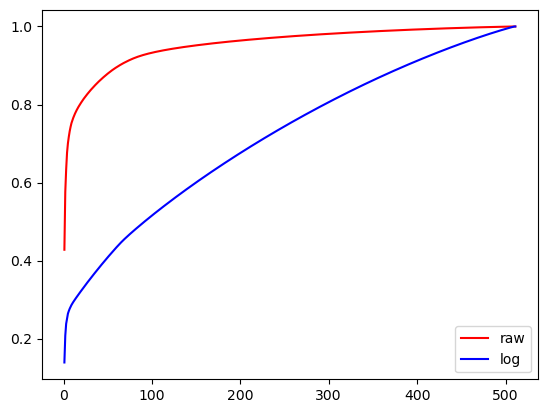

In [39]:
# cumalative variance explained plots
plt.plot(range(1, X.shape[0]+1), np.cumsum(pca.explained_variance_ratio_),  color="red", label="raw")
plt.plot(range(1, X.shape[0]+1), np.cumsum(pca_log.explained_variance_ratio_), color="blue", label="log")
plt.legend()
plt.show()

In [43]:
# 85% variance cutoffs
print("Raw:", np.where(np.cumsum(pca.explained_variance_ratio_) >= .85)[0][0] + 1)
print("Log:", np.where(np.cumsum(pca_log.explained_variance_ratio_) >= .85)[0][0] + 1)

Raw: 36
Log: 339
